### Cats and Dogs com um dataset reduzido

In [41]:
# Obtendo os diretorios com as imagens

import os, shutil

base_dir = os.getcwd()
base_dir = os.path.join(base_dir, 'cats_and_dogs_small')

train_dir = os.path.join(base_dir, 'train')
train_dir_cats = os.path.join(base_dir, 'train/cats')
train_dir_dogs = os.path.join(base_dir, 'train/dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_dir_cats = os.path.join(base_dir, 'validation/cats')
validation_dir_dogs = os.path.join(base_dir, 'validation/dogs')

test_dir = os.path.join(base_dir, 'test')
test_dir_cats = os.path.join(base_dir, 'test/cats')
test_dir_dogs = os.path.join(base_dir, 'test/dogs')

train_dir_cats

'C:\\Users\\vitor\\Desktop\\Iniciação Científica\\Notebooks\\cats_and_dogs_small\\train/cats'

In [42]:
print('total training cat images', len(os.listdir(train_dir_cats)))

total training cat images 1000


In [43]:
print('total training dog images', len(os.listdir(train_dir_dogs)))

total training dog images 1000


In [4]:
print('total validation cat images', len(os.listdir(validation_dir_cats)))

total validation cat images 500


In [5]:
print('total validation dogs images', len(os.listdir(validation_dir_dogs)))

total validation dogs images 500


In [6]:
print('total test cat images', len(os.listdir(test_dir_cats)))

total test cat images 500


In [44]:
print('total test dog images', len(os.listdir(test_dir_dogs)))

total test dog images 500


In [8]:
# Construindo a rede
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation ='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
# Compilando a rede
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [11]:
# Processando os dados usando ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# train_generator é um gerador de lotes que gera uma quantidade indeterminada
# de lotes. Por isso deve ser parada manualmente com brake.
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [13]:
# Fitting the model using a batch generator

#Como estamos usando um gerador de lote que gera lotes de forma indefinida,
# devemos especificar quantas estapas por época, para não ficar gerando lotes infinitos

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps = 50)


Epoch 1/30


C:\Users\vitor\AppData\Local\Temp\ipykernel_13768\3986253424.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 53s 515ms/step - loss: 0.6856 - acc: 0.5465 - val_loss: 0.7022 - val_acc: 0.5120
Epoch 2/30
100/100 [==============================] - 56s 561ms/step - loss: 0.6520 - acc: 0.6075 - val_loss: 0.6301 - val_acc: 0.6400
Epoch 3/30
100/100 [==============================] - 52s 516ms/step - loss: 0.6012 - acc: 0.6690 - val_loss: 0.6051 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 53s 526ms/step - loss: 0.5644 - acc: 0.7080 - val_loss: 0.6099 - val_acc: 0.6520
Epoch 5/30
100/100 [==============================] - 58s 578ms/step - loss: 0.5377 - acc: 0.7250 - val_loss: 0.5677 - val_acc: 0.7050
Epoch 6/30
100/100 [==============================] - 50s 500ms/step - loss: 0.5168 - acc: 0.7420 - val_loss: 0.5595 - val_acc: 0.7280
Epoch 7/30
100/100 [==============================] - 53s 528ms/step - loss: 0.4950 - acc: 0.7515 - val_loss: 0.5871 - val_acc: 0.6800
Epoch 8/30
100/100 [==============================] - 59s 586ms/st

In [14]:
model.save('cats_and_dogs_small_1.h5')

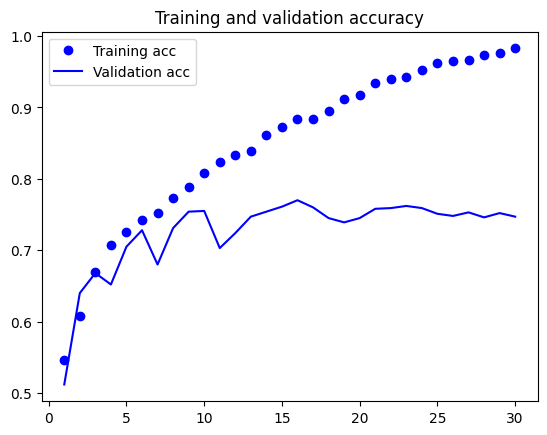

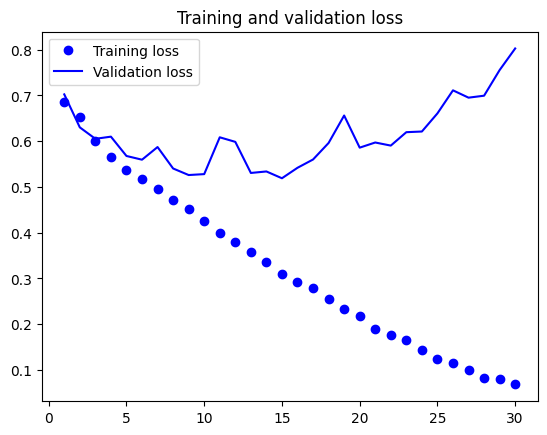

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Gerando data augmentation para minimizar o overfitting

In [16]:
# Gerando data augmentation para minimizar o overfitting

datagen = ImageDataGenerator(rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            fill_mode = 'nearest')

#rotation_range: (0-180) aleatoriamente gira a imagem a no maximo a valor definido
#width_shift e heigth_shift: (0-1) desloca a imagem em um valor aleatorio a no maximo o valor definido
#shear_range: inclinação trapezoidal aleatoria
#zoom_range: zoom aleatorio
#horizonal_flip: aleatoriamente gira horizontalmente metade das imagens
#fill_mode: estrategia para preencher os pixels vazios que surgem a partir das transformações

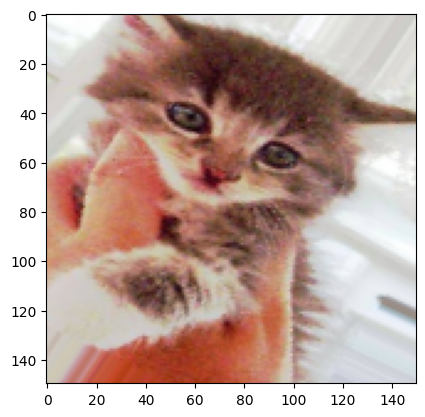

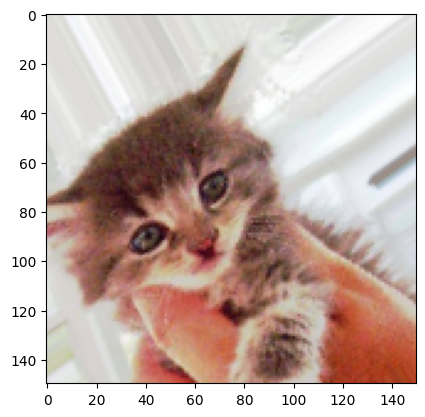

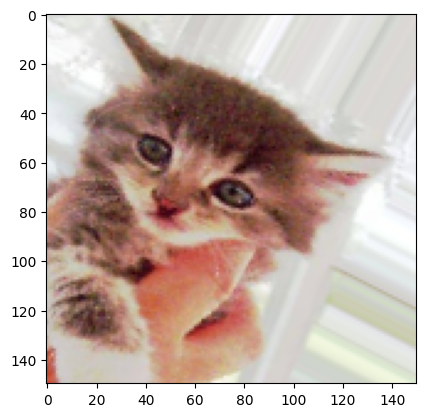

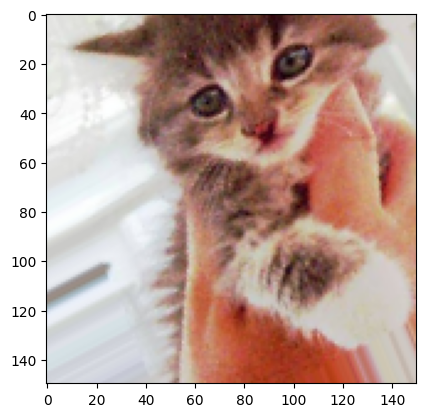

In [17]:
#Mostrando algumas imagens geradas aleatoriamente
from keras.preprocessing import image
from keras import utils

#lista com o diretorio de todos os arquivos dentro da pasta de treino dos gatos
fnames = [os.path.join(train_dir_cats, fname) for fname in os.listdir(train_dir_cats) ]

img_path = fnames[3]

img = utils.load_img(img_path, target_size = (150,150))

#convertendo para um array numpy (150,150,3)
x = utils.img_to_array(img)
# reshape para (1,150,150,3)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [18]:
# Definindo uma nova rede que inclui dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [19]:
# Treinando a rede usando geradores com data_augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gerator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 50s 489ms/step - loss: 0.6922 - acc: 0.5180 - val_loss: 0.6810 - val_acc: 0.6030
Epoch 2/100
100/100 [==============================] - 41s 414ms/step - loss: 0.6748 - acc: 0.5845
Epoch 3/100
100/100 [==============================] - 42s 419ms/step - loss: 0.6473 - acc: 0.6285
Epoch 4/100
100/100 [==============================] - 42s 419ms/step - loss: 0.6156 - acc: 0.6685
Epoch 5/100
100/100 [==============================] - 43s 427ms/step - loss: 0.5765 - acc: 0.7045
Epoch 6/100
100/100 [==============================] - 42s 421ms/step - loss: 0.5508 - acc: 0.7170
Epoch 7/100
100/100 [==============================] - 43s 428ms/step - loss: 0.5343 - acc: 0.7380
Epoch 8/100
100/100 [==============================] - 42s 422ms/step - loss: 0.5125 - acc: 0.7405
Epoch 9/100
100/100 [==============================] - 46s 455ms/step - loss: 0.4937 - 

In [35]:
model.save('cats_and_dogs_small_2.h5')

In [32]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 1000,
    class_mode = 'binary'
    )

Found 1000 images belonging to 2 classes.


In [36]:
model.evaluate(test_generator, steps = 1)

1/1 [==============================] - 7s 7s/step - loss: 1.0271 - acc: 0.7830


[1.0270586013793945, 0.7829999923706055]